# Titanic survived Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have 5 features with object datatypes & rest are with numerical features

In [9]:
#lets sort columns by their datatype
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']}

Here our objective is to predict survival using classification algorithim for that Here our target variable is 'Survived'.

In [10]:
#data analysis
data.duplicated().sum()

0

In [12]:
#Checking for presense of whitespaces, '?','null'
data.isin([' ','?','-','null','NA']).sum().any()

False

In [6]:
#checking if any null values are present in the dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1 - We can observe that theres no duplicates, whitespaces, ? present in opur dataset.
2 - We can also see that there are null values present in 'Age','Cabin', and 'Embarked'.
3 - Dropping 'Cabin' since mostly of its values is missing and therefore it cannot contribute to building a good model for predicting the target variable values.

In [14]:
data.drop(columns=['Cabin'],inplace=True)

In [15]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

1 - Survived" - Target / Label column has 2 categories.

2 - "sex" - Feature column has 2 categories.

3 - "Pclass" - Feature column has 2 categories.

4 - "Embarked" - Feature column has 3 categories.

5 - "SibSp" - Feature column has 7 discrete values.

6 - "Parch" - Feature column has 7 discrete values.

In [16]:
#survived passengers counts
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Out of 891 passengers, only around 342 survived.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

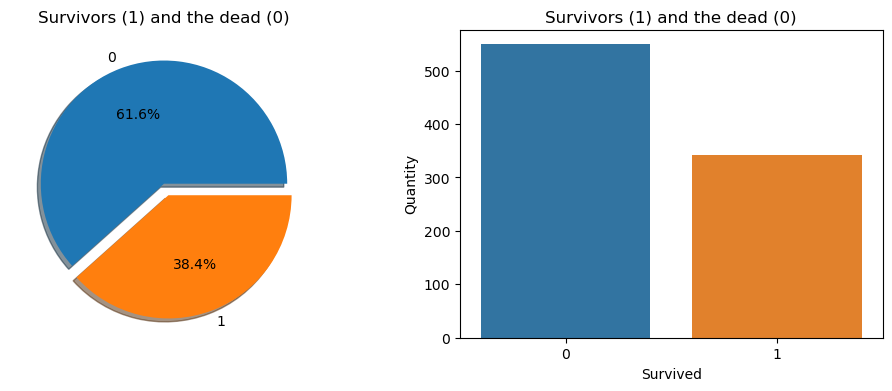

In [60]:
#Visualizing the count of survivors
fig, ax = plt.subplots(1,2, figsize = (12,4))
data['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survivors (1) and the dead (0)')
ax[1].set_ylabel('Quantity')
plt.show()

We can see that many passengers did not survive.

In [48]:
#lets check gender-wise survival rate of passengers
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

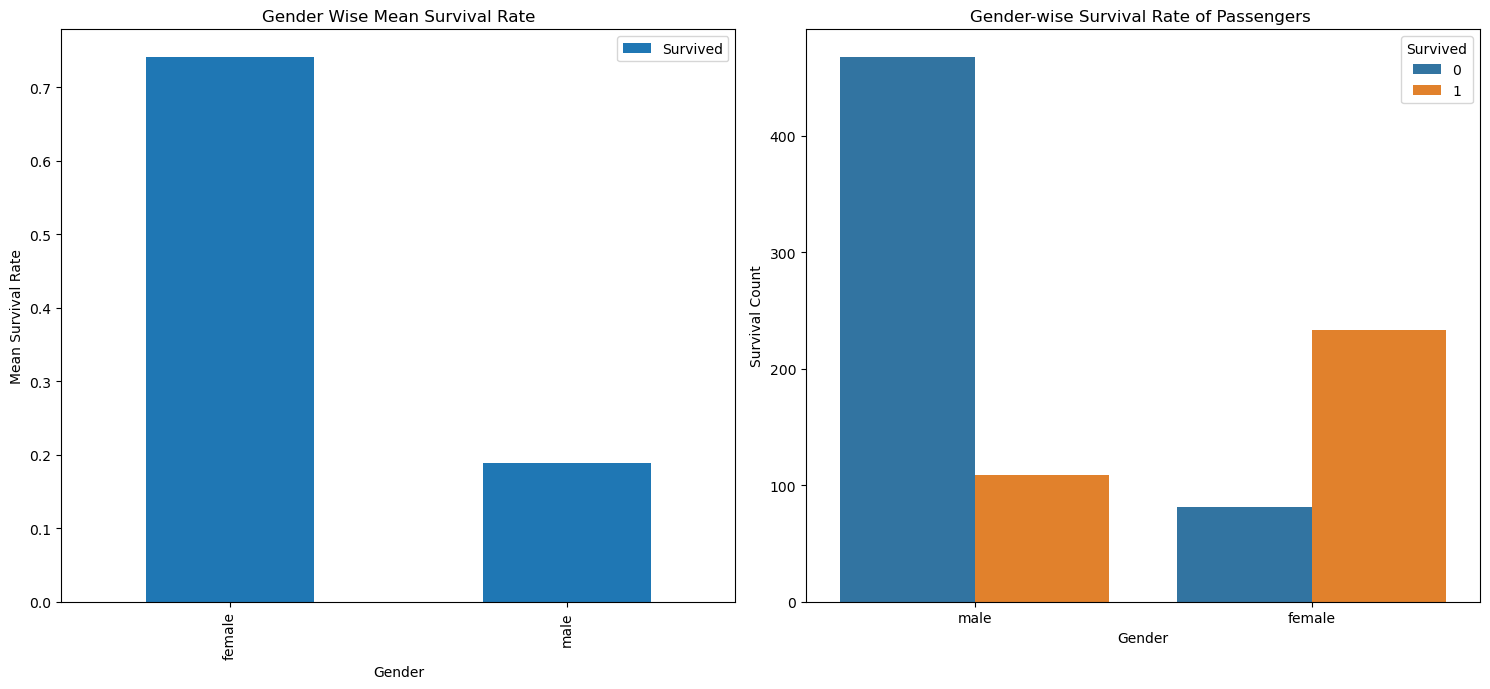

In [54]:
f,ax=plt.subplots(1,2,figsize=(15,7))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Gender Wise Mean Survival Rate')
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Mean Survival Rate")
sns.countplot('Sex', hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Gender-wise Survival Rate of Passengers ')
ax[1].set_xlabel("Gender")
ax[1].set_ylabel("Survival Count")
plt.tight_layout()
plt.show()

The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved.

In [56]:
#exploration of passengers class vs survival
pd.crosstab(data.Pclass,data.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


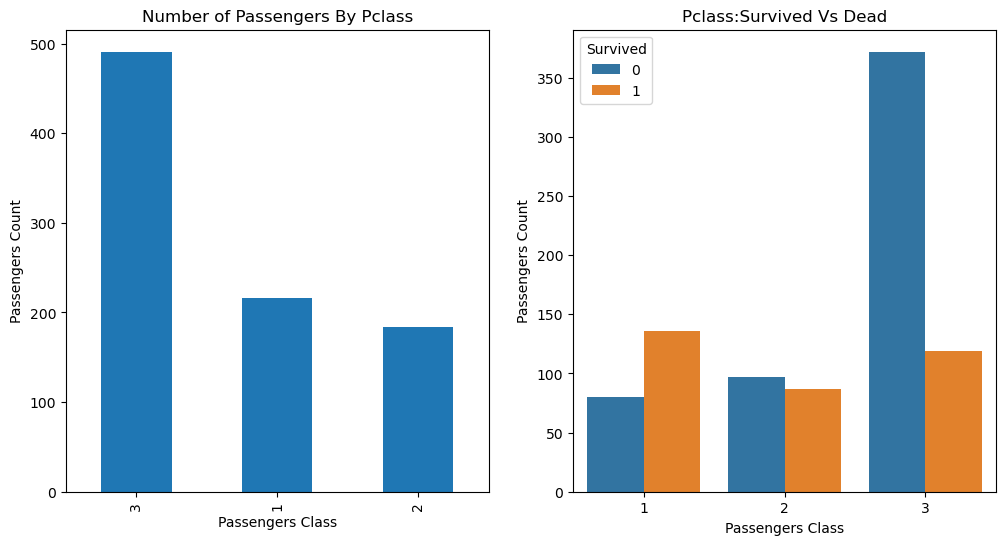

In [58]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Passengers Count')
ax[0].set_xlabel('Passengers Class')
sns.countplot('Pclass',hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived Vs Dead')
ax[1].set_ylabel('Passengers Count')
ax[1].set_xlabel('Passengers Class')
plt.show()

We can see that Passengers of Pclass 1 were given a very high priority while rescue. Even though the the number of passengers in Pclass 3 were a lot higher, still the number of survival from Pclass 3 is very low.

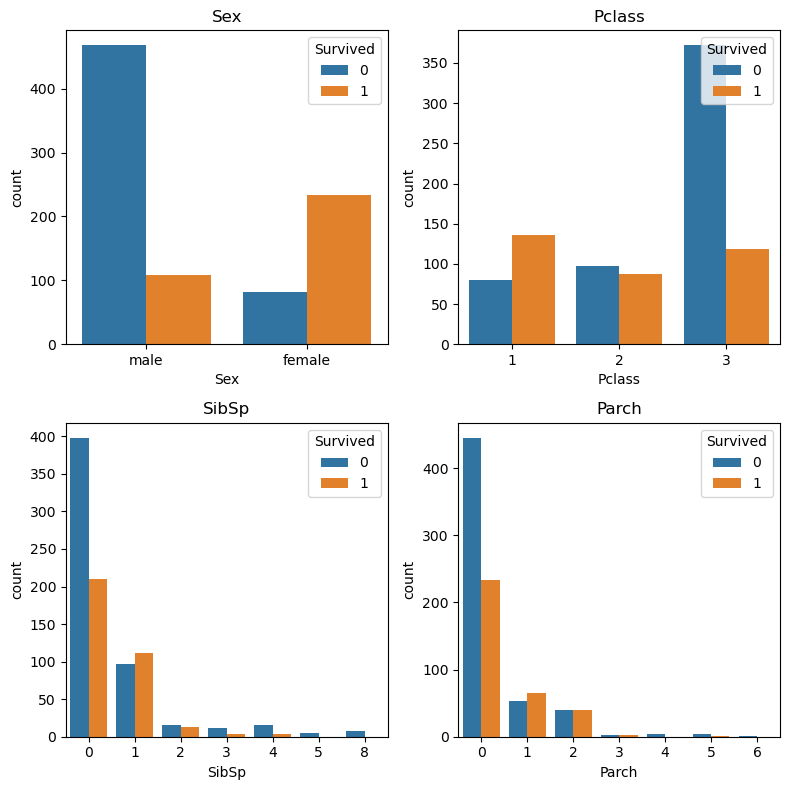

In [75]:
#Visualize the count of survivors for columns 'Sex', 'Pclass', 'Sibsp', 'Parch' and 'Embarked'.
columns = ['Sex', 'Pclass', 'SibSp', 'Parch']

rows = 2
cols = 2

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(rows, cols, figsize = (cols * 4, rows * 4))

for r in range(0, rows):
    for c in range(0, cols):
        
        i = r * cols + c #index to go through the number of columns
        ax = axs[r][c]#Show where to position each subplot
        sns.countplot(data[columns[i]], hue = data['Survived'], ax = ax)
        ax.set_title(columns[i])
        ax.legend(title = 'Survived', loc = 'upper right')
        
plt.tight_layout()

1 - For Sibling/Spouse if the number is 0 then most likly the majority of those passengers did not survive.
2 - Same with Parent/Child the passenger without parent or child most likely did not survive the sink.

In [76]:
#Look at the survival rate by sex.
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Age'>

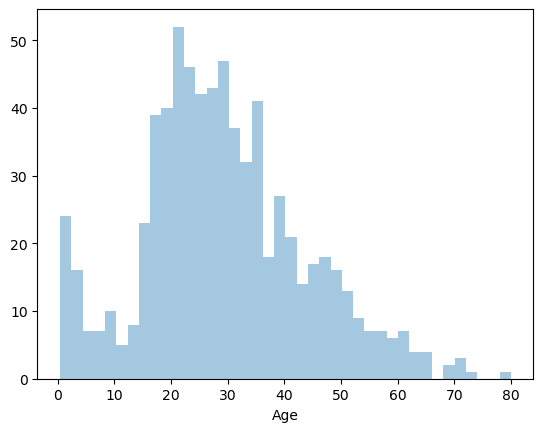

In [78]:
sns.distplot(data["Age"].dropna(), kde = False, bins = 40)

Age is normally distributed since it's like a bell curve. Most of the people are in around 15-40 range

<AxesSubplot:xlabel='SibSp', ylabel='count'>

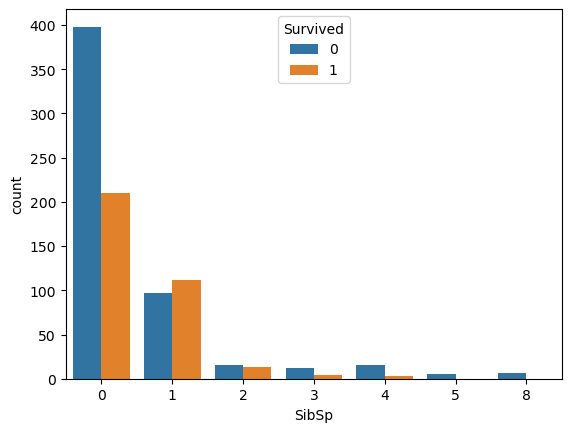

In [80]:
sns.countplot("SibSp", hue = "Survived", data = data)

Single passenger has more probability to die

<AxesSubplot:xlabel='Embarked', ylabel='count'>

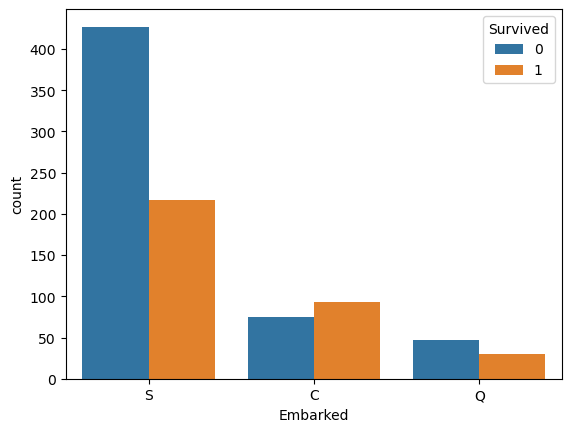

In [81]:
sns.countplot("Embarked", hue = "Survived", data = data)

Most people embarked from S. People from C has more survival rate

<AxesSubplot:xlabel='Fare'>

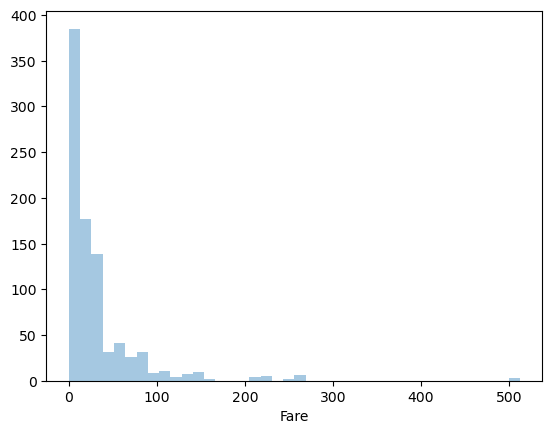

In [85]:
sns.distplot(data["Fare"], kde = False, bins = 40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

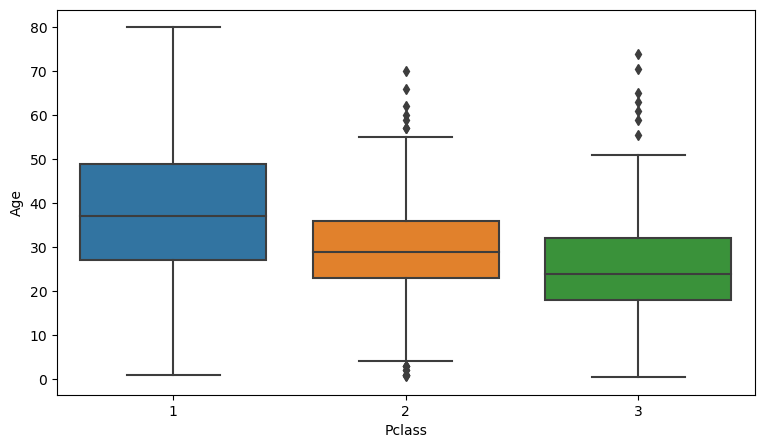

In [87]:
plt.figure(figsize = (9,5))
sns.boxplot(x = "Pclass", y = "Age", data = data)

We can see that the passengers in higher class tend to be older

We can use average age values to impute based on Pclass

### Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between Pclass and Age'}, xlabel='Pclass', ylabel='Age'>

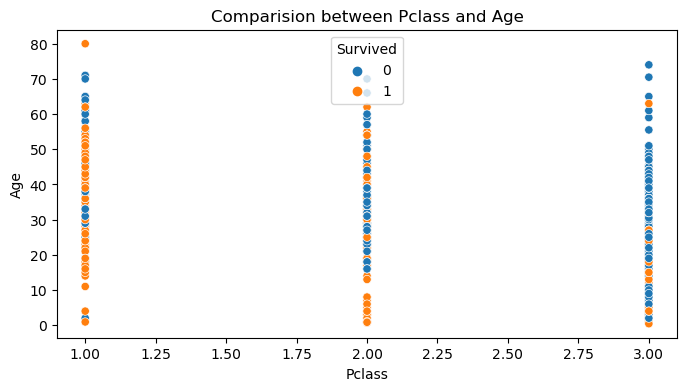

In [91]:
# Checking the relation between two variables
plt.figure(figsize=[8,4])
plt.title('Comparision between Pclass and Age')
sns.scatterplot(data['Pclass'],data['Age'],hue=data["Survived"])

This is the comparision between the Age and Pclass on the basis of target variable. Here orange dots are all the passengers who are dead and blue dots are the passengers who are survived. As we can see in the plot, the passengers travelled in the 1st(Upper) class who were aged 5 to 25 and 40 to 55 are survived. Most of the passengers who travelled in the 2nd(Middle) class whose age between 15 to 60 were dead and only few passengers survived. Most of the passengers of all the age, who were travelled in the 3rd class are dead compared to the other two classes.

<AxesSubplot:title={'center':'Comparision between Pclass and Sex'}, xlabel='Pclass', ylabel='Sex'>

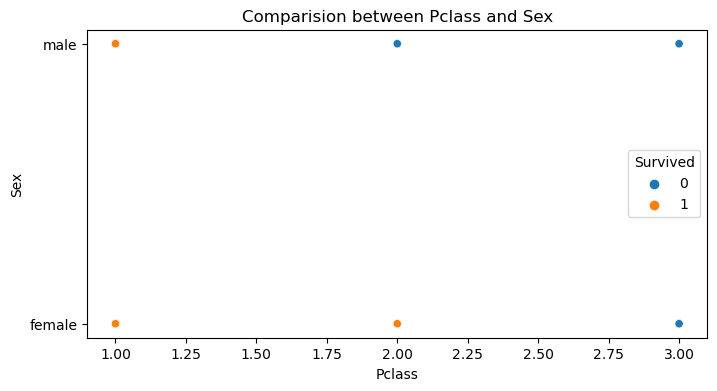

In [92]:
plt.figure(figsize=[8,4])
plt.title('Comparision between Pclass and Sex')
sns.scatterplot(data['Pclass'],data['Sex'],hue=data["Survived"])

This plot gives the comparision between the Pclass and Sex. As we can see both male snd female passengers who were in the 1st class were survived. In the 2nd class only female passengers were survived but not male. And in the 3rd class both male and female passengers were dead.

<AxesSubplot:title={'center':'Comparision between Age and Embarked'}, xlabel='Embarked', ylabel='Age'>

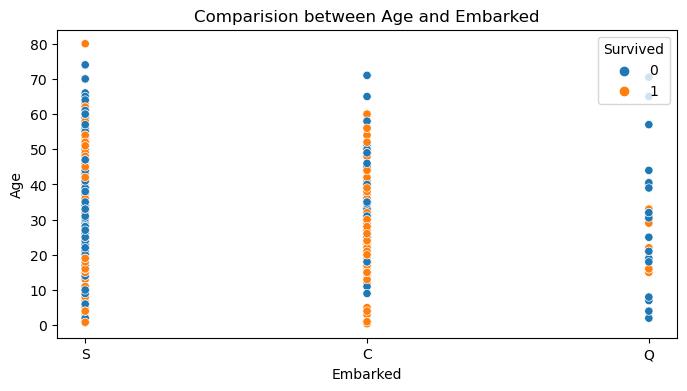

In [97]:
# Checking the relation between two variables
plt.figure(figsize=[8,4])
plt.title('Comparision between Age and Embarked')
sns.scatterplot(data['Embarked'],data['Age'],hue=data["Survived"])

The passengers who embarked for Southampton(S) (age between 20 to 40) are dead. Most of the passengers who embarked for Cherbourg(C) were survived compared to S and Q. And only few passengers survived who embarked for Queenstown(Q)

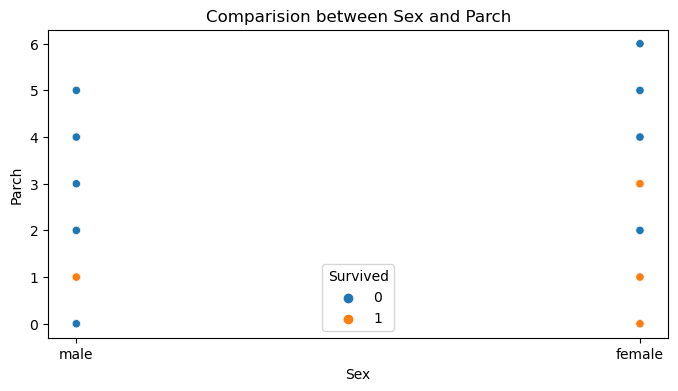

In [98]:
#Checking the relation between two variables
plt.figure(figsize=[8,4])
plt.title('Comparision between Sex and Parch')
sns.scatterplot(data['Sex'],data['Parch'],hue=data["Survived"]);

The above plot gives the comparision between the features Sex and Parch on the basis of label Survived. Most of the passengers have the relation to each other. There are only few passengers survived both male and female.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

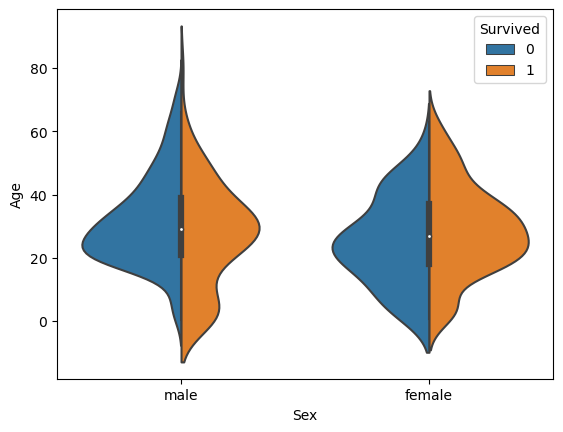

In [100]:
#Let's plot violinplot for Age and Sex
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True)

This gives the age summary of men, women and the children who were saved from the disaster. Here we can see the survival rate of children is good and it is high for the women in the age range 20-50 and less for men as the age increases.

<AxesSubplot:>

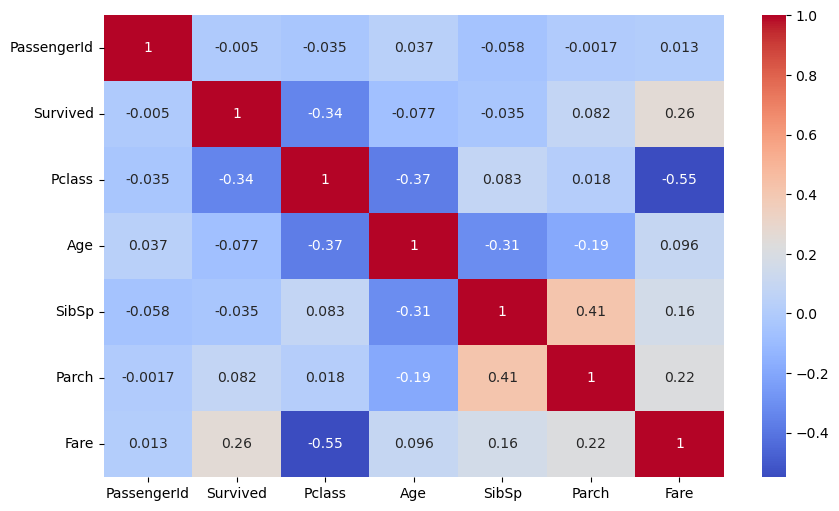

In [118]:
# Visualizing the correlation matrix by plotting heat map.
corr=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')

This heat map contains both positive and negative correlation.

We can observe that the feature column Parch and Fare are positively correlated with the target variable "Survived". Pclass is highly negatively correlated with the target variable "Survived". Also the columns SibSp, Age and PassengerId are negatively correlated with the label. The feature columns SibSp and Parch are positively correlated with each other. Light shades are highly correlated. Dark shades are less correlated. Also there are some independent variables which shows highly negative correlattion between each other. So we can check the multicollinearity problem using VIF if necessary.

In [ ]:
#Correlation with Target Variables Survived

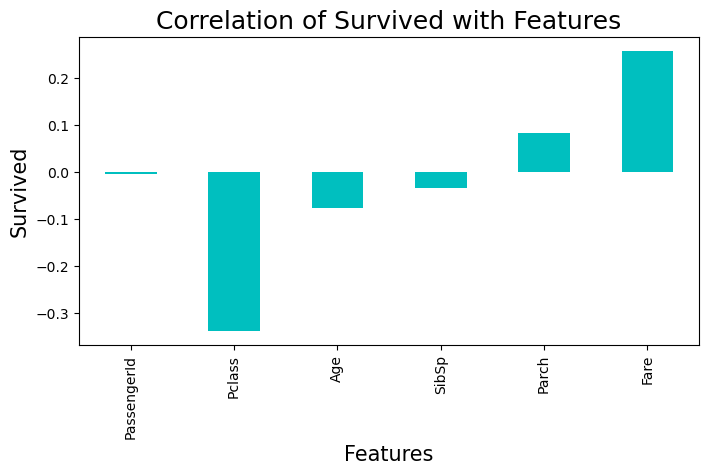

In [119]:
plt.figure(figsize = (8,4))
data.corr()['Survived'].drop(['Survived']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('Correlation of Survived with Features',fontsize = 18)
plt.show()

In [121]:
#dropping irrelevant column
data.drop('PassengerId', axis=1, inplace = True )  #dropping PassengerId column
data.drop('Name',axis=1, inplace=True)  #Name has no important to build our model
data.drop('Ticket',axis=1, inplace=True)  #Ticket also has no important to build our model

Survived       AxesSubplot(0.125,0.712609;0.168478x0.167391)
Pclass      AxesSubplot(0.327174,0.712609;0.168478x0.167391)
Age         AxesSubplot(0.529348,0.712609;0.168478x0.167391)
SibSp       AxesSubplot(0.731522,0.712609;0.168478x0.167391)
Parch          AxesSubplot(0.125,0.511739;0.168478x0.167391)
Fare        AxesSubplot(0.327174,0.511739;0.168478x0.167391)
dtype: object

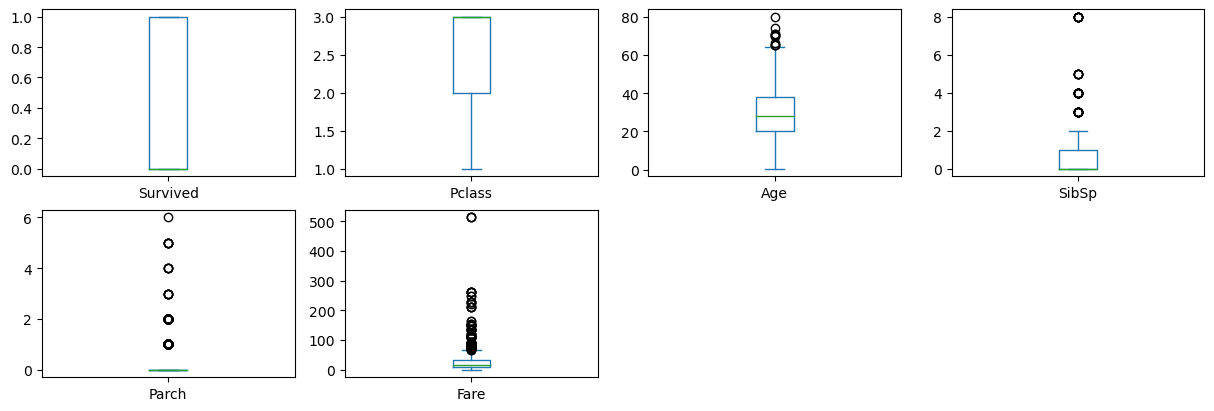

In [123]:
#Identifying the outliers
data.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,10))

From the above boxplots we can observe that the outliers present in Age, Fare, SibSp and Parch. I am not going to remove outliers in the features SibSp and Parch since they are descrete data type. But We should remove the outliers in Age and Fare which are continuous data.

## Data Cleaning

In [124]:
#Age is a numerical column and has outliers so I will use median method to fill the missing values.
data["Age"] = data["Age"].fillna(data["Age"].median())

In [125]:
#Embarked is a categorical column so we can make use of mode methods to fill the missing values
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [126]:
#checking the null values
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

So we have filled the null values here. There are no null values exists and now our data is cleaned.

<AxesSubplot:>

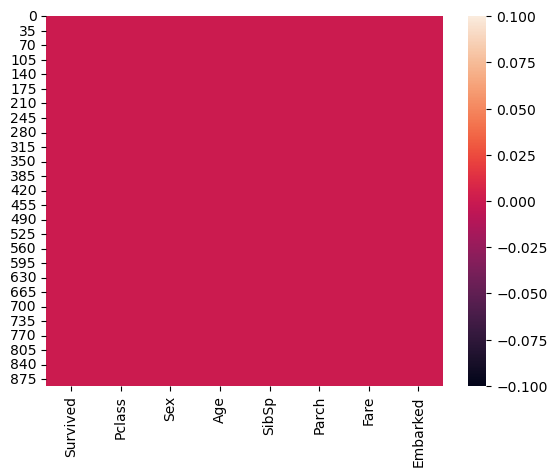

In [127]:
#Visualizing the missing value after treating it using heat map.
sns.heatmap(data.isnull())

## Outliers removal

In [129]:
#zscore method
# Continuous features having outliers 
variables = data[['Age','Fare']]

In [130]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(variables))
# Creating new dataframe
new_df = data[(z<3).all(axis=1)]
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


This is the new dataframe after removing the outliers.

In [131]:
print(data.shape)
print(new_df.shape)

(891, 8)
(864, 8)


The original dataset contains 891 rows and 10 columns. The new dataframe. contains 864 rows and 10 columns.

In [132]:
# Let's check the the data loss
data_loss = (891-864)/891*100
data_loss

3.0303030303030303

This is the percentage loss of our data. Here I am not losing more data so I am removing the outliers.

In [133]:
#IQR(Inter Quantile Range) method
# 1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [134]:
print(data.shape)
print(df1.shape)

(891, 8)
(721, 8)


In [136]:
# Let's check the dataloss
data_loss = (891-721)/891*100
data_loss

19.07968574635241

So by using IQR method we can observe great data loss. So I am going to consider Zscore method.

In [138]:
#Checking the skewness
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare        2.257178
dtype: float64

We can observe the features Pclass, SibSp, Parch and Fare has skewness. Since Pclass is categorical column so we should not remove skewness. Let's remove skewness in Age, SibSp, Parch and Fare which contains numerical data

In [139]:
#Removing Skewness using yeo-johnson method
skewed_features = ["SibSp","Parch","Fare"]

In [141]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [142]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,SibSp,Parch,Fare
0,1.374574,-0.548637,-0.882769
1,1.374574,-0.548637,1.529038
2,-0.680931,-0.548637,-0.792444
3,1.374574,-0.548637,1.216581
4,-0.680931,-0.548637,-0.776493


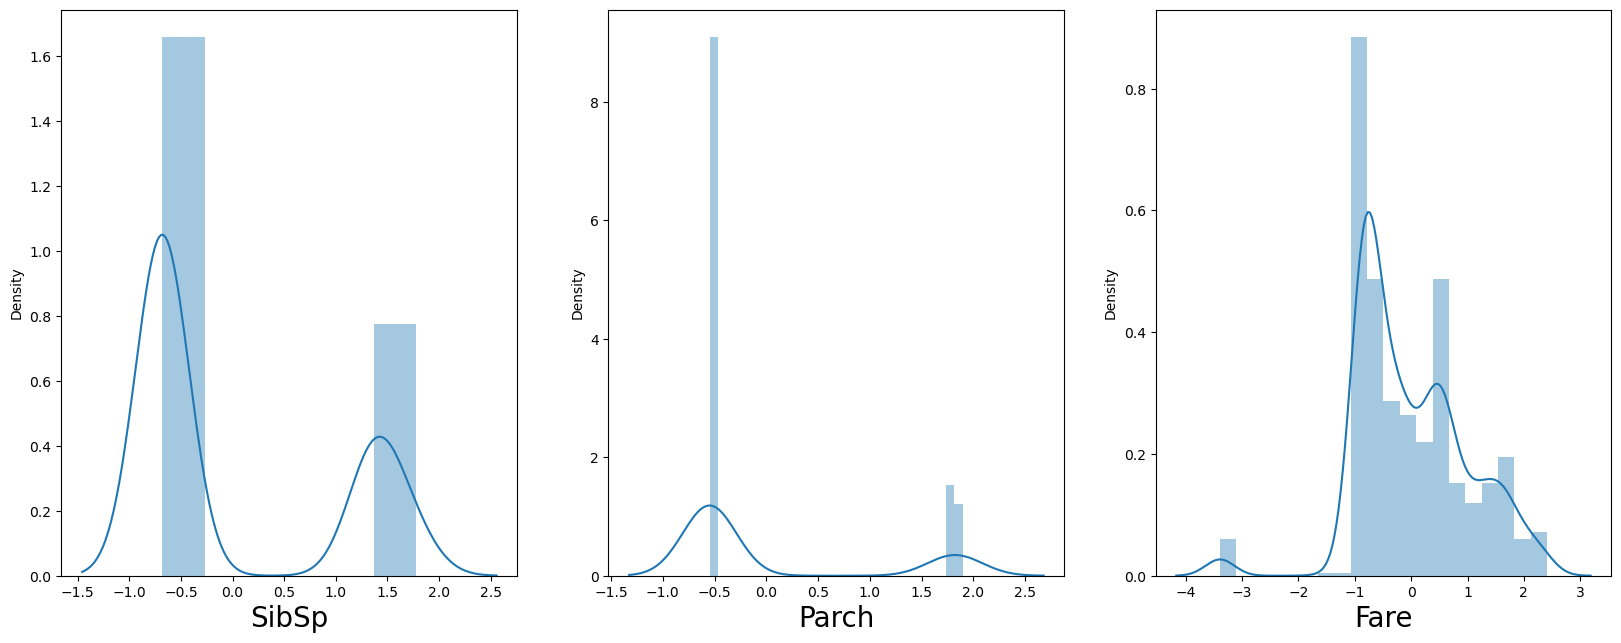

In [145]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has got removed compared to the old data.

In [146]:
# Now let's check the skewness
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       0.805038
Parch       1.277888
Fare       -0.009095
dtype: float64

So we can see the skewness is almost reduced here compare to our old data.

## Encoding the data using Label Encoding

In [147]:
#checking unique values for Sex and Embarked column.
print(data['Sex'].unique())
print(data['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [151]:
cols = ["Sex", "Embarked"]

In [152]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[cols]= new_df[cols].apply(LE.fit_transform)

In [153]:
new_df[cols].head()

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


Now our caregorical data has been converted into the numerical data. Here we can see the unique value counts of all the encoded columns.

In [155]:
#Dataset after cleaning and encoding
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.374574,-0.548637,-0.882769,2
1,1,1,0,38.0,1.374574,-0.548637,1.529038,0
2,1,3,0,26.0,-0.680931,-0.548637,-0.792444,2
3,1,1,0,35.0,1.374574,-0.548637,1.216581,2
4,0,3,1,35.0,-0.680931,-0.548637,-0.776493,2


In [156]:
#Separating the independent and target variables into x and y
x = new_df.drop("Survived", axis=1)
y = new_df["Survived"]

In [157]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1.374574,-0.548637,-0.882769,2
1,1,0,38.0,1.374574,-0.548637,1.529038,0
2,3,0,26.0,-0.680931,-0.548637,-0.792444,2
3,1,0,35.0,1.374574,-0.548637,1.216581,2
4,3,1,35.0,-0.680931,-0.548637,-0.776493,2


Dataset containg all independent variables.

In [158]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

The data is not balanced. Since we have class imbalancing issue in the dataset so we need to balance it. Here I am using oversampling method to balance the class.

In [160]:
#Balancing the data using oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [161]:
#Checking the value counts again
y.value_counts()

0    537
1    537
Name: Survived, dtype: int64

So we can observe clearly that the data is balanced in both the classes.

<AxesSubplot:xlabel='Survived', ylabel='count'>

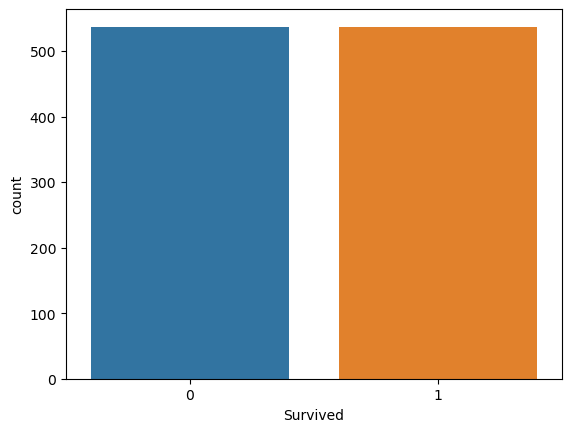

In [163]:
#Visualizing the data after oversampling
sns.countplot(y)

So by visualization we can see the data is balanced by increasing the number of survival rate.

## Scaling data using Min-Max Scaler

In [164]:
x.shape, y.shape

((1074, 7), (1074,))

In [165]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [166]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.329064,0.83479,0.0,0.432617,1.0
1,0.0,0.0,0.573041,0.83479,0.0,0.848336,0.0
2,1.0,0.0,0.390058,0.00000,0.0,0.448186,1.0
3,0.0,0.0,0.527295,0.83479,0.0,0.794478,1.0
4,1.0,1.0,0.527295,0.00000,0.0,0.450936,1.0


This is our scaled data. By using min max scaler we can see that the values are between 0 and 1.

## Modeling

#### Finding the best random state

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8575851393188855  on Random_state  195


### Creating train-test split

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

We have created new train test split using the random state.

In [170]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((751, 7), (751,), (323, 7), (323,))

## Classification Algorithms

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

## DecisionTreeClassifier

In [173]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8575851393188855
[[137  25]
 [ 21 140]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       162
           1       0.85      0.87      0.86       161

    accuracy                           0.86       323
   macro avg       0.86      0.86      0.86       323
weighted avg       0.86      0.86      0.86       323



Here we are getting 84% accuracy using Decision Tree Classifier.

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

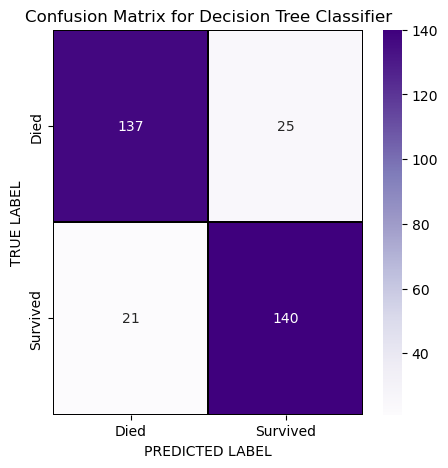

In [175]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

From the plot we can easily observe the predicted values and true values.

True-Positive = 140
False-Positive = 27
False-Negative = 24
True -Negative = 132

## Random Forest Classifier

In [176]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8575851393188855
[[137  25]
 [ 21 140]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       162
           1       0.85      0.87      0.86       161

    accuracy                           0.86       323
   macro avg       0.86      0.86      0.86       323
weighted avg       0.86      0.86      0.86       323



we are getting 86% accuracy using Random Forest Classifier.

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

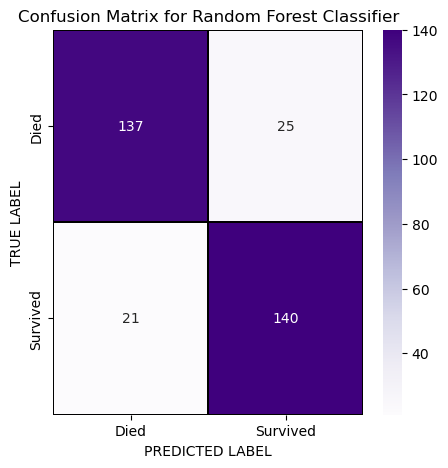

In [178]:
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')

From the plot we can easily observe the predicted values and true values.

True-Positive = 143
False-Positive = 24
False-Negative = 19
True -Negative = 137

## Support Vector Machine Classifier

In [179]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8297213622291022
[[135  27]
 [ 28 133]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       162
           1       0.83      0.83      0.83       161

    accuracy                           0.83       323
   macro avg       0.83      0.83      0.83       323
weighted avg       0.83      0.83      0.83       323



we are getting 83% accuracy using Support Vector Machine Classifier.

Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine CLassifier')

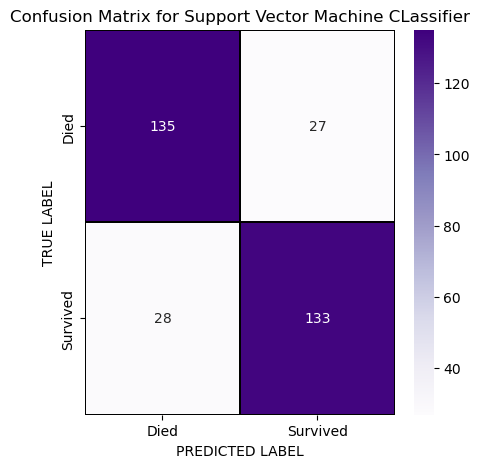

In [181]:
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine CLassifier')

From the plot we can easily observe the predicted values and true values.

True-Positive = 140
False-Positive = 27
False-Negative = 27
True -Negative = 129

## Logistic Regression

In [182]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8080495356037152
[[125  37]
 [ 25 136]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       162
           1       0.79      0.84      0.81       161

    accuracy                           0.81       323
   macro avg       0.81      0.81      0.81       323
weighted avg       0.81      0.81      0.81       323



we are getting 79% accuracy using Logistic Regression.

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

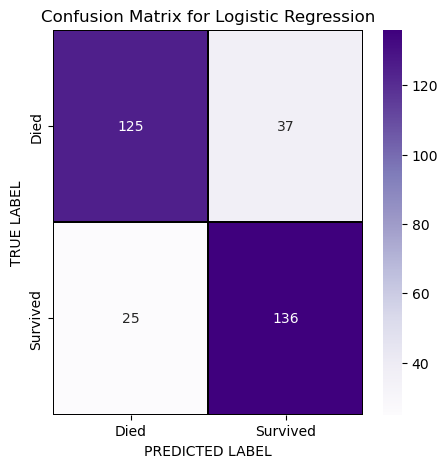

In [184]:
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')

From the plot we can easily observe the predicted values and true values.

True-Positive = 126
False-Positive = 41
False-Negative = 24
True -Negative = 132

## KNN Classifier

In [185]:
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8513931888544891
[[136  26]
 [ 22 139]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       162
           1       0.84      0.86      0.85       161

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



we are getting 82% accuracy using KNN Classifier.

Text(0.5, 1.0, 'Confusion Matrix for  KNN classifier')

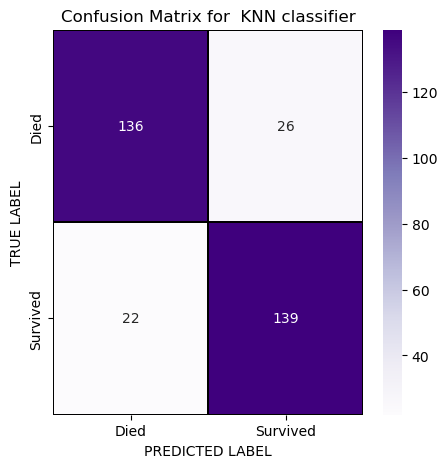

In [187]:
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  KNN classifier')

From the plot we can easily observe the predicted values and true values.

True-Positive = 135
False-Positive = 32
False-Negative = 24
True -Negative = 132

## Gradient Boosting Classifier

In [188]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8606811145510835
[[140  22]
 [ 23 138]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       162
           1       0.86      0.86      0.86       161

    accuracy                           0.86       323
   macro avg       0.86      0.86      0.86       323
weighted avg       0.86      0.86      0.86       323



we are getting 85% accuracy using Gradient Boosting Classifier.

Text(0.5, 1.0, 'Confusion Matrix for  Gradient Boosting classifier')

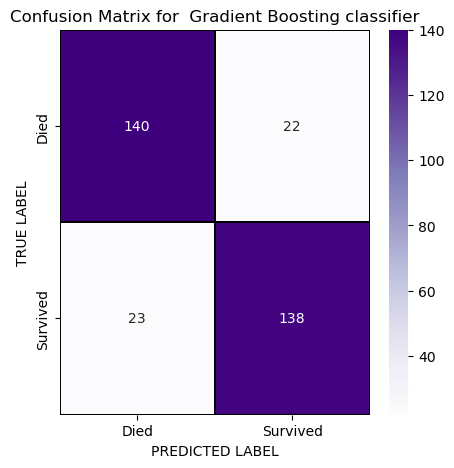

In [189]:
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Gradient Boosting classifier')

From the plot we can easily observe the predicted values and true values.

True-Positive = 140
False-Positive = 27
False-Negative = 19
True -Negative = 137

## Checking the Cross Validation Score

In [190]:
from sklearn.model_selection import cross_val_score

In [191]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.811958269941317


In [192]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8370919365355359


In [193]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.8212736361660509


In [194]:
# cv score for Logistic Regression 
print(cross_val_score(LR,x,y,cv=5).mean())

0.793340578135188


In [195]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.8380439034992392


In [196]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.838948054770702


From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.



## Hyper parameter tuning for the best model

In [197]:
from sklearn.model_selection import GridSearchCV

In [202]:
# Random Forest Classifier
parameters = {'n_estimators':[0,100],
             'criterion':['gini','entropy'],
             'max_depth':np.arange(2,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30,40]}

In [203]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [204]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30, 40],
                         'n_estimators': [0, 100]})

In [205]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 21,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'n_estimators': 100}

This gives the best parameter value.

In [206]:
Titanic_survived = RandomForestClassifier(criterion='entropy',max_depth=30, max_features='auto', max_leaf_nodes=40, n_estimators=200)
Titanic_survived.fit(x_train, y_train)
pred = Titanic_survived.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.30650154798761


Here the final model gives 87% accuracy after tuning.



##  Plotting ROC-AUC curve

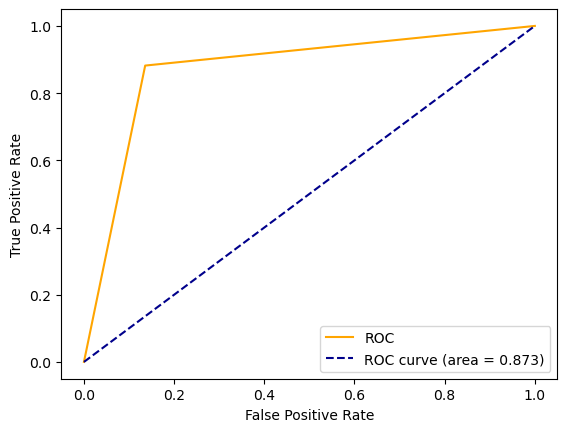

In [207]:
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate.

So the best model has the area under curve as 0.87.

## Saving the model

In [212]:
import pickle
filename = 'Titanic.pkl'
pickle.dump(RFC,open(filename,'wb'))

In [214]:
#Prediction using the saved model
loaded_model = pickle.load(open('Titanic.pkl','rb'))

In [215]:
#Loading model
a = loaded_model.predict(x_test)
a

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [216]:
a = np.array(y_test)
predicted = np.array(Titanic_survived.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,1
...,...,...
318,0,0
319,1,1
320,0,0
321,1,1
